![EDA](EDA.png)

# Projeto EDA - Análise Exploratória de Dados - Vendas

Objetivo: Colocar em prática os conhecimentos adquiridos em Python nos últimos meses de estudo. Para este projeto usarei a biblioteca Pandas para gerar um conjunto randômico e fictício de dados de vendas. Com a biblioteca Matplotlib irei realizar na sequência uma análise exploratória dos dados para entender a estrutura e a distribuição dos dados, identificar padrões, tendências e anomalias. Para finalizar será criado alguns gráficos com objetivo de apoiar a comunicação final do projeto. 




# Passo 1: gerar dataset e criar arquivo .csv

In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Criando listas vazias para armazenar os dados
datas = []
produtos = []
vendas = []
precos = []

# Definindo a quantidade de linhas para o conjunto de dados
num_linhas = 100

# Gerando dados aleatórios para as datas, produtos, vendas e preços
for _ in range(num_linhas):
    # Gerando datas aleatórias dentro de um intervalo de 6 meses
    data = datetime(2023, random.randint(1, 6), random.randint(1, 28))
    datas.append(data)
    
    # Gerando nomes fictícios de produtos
    produto = f"Produto {random.randint(1, 10)}"
    produtos.append(produto)
    
    # Gerando valores aleatórios de vendas
    venda = random.randint(1, 100)
    vendas.append(venda)
    
    # Gerando preços aleatórios entre R$50 e R$500
    preco = round(random.uniform(50, 500), 2)
    precos.append(preco)

# Criando um DataFrame usando pandas
data = {
    'Data': datas,
    'Produto': produtos,
    'Vendas': vendas,
    'Preço': precos
}
df = pd.DataFrame(data)

# Mostrando as primeiras linhas do DataFrame para verificação
print(df.head())

# Salvando o DataFrame como um arquivo CSV
df.to_csv('dados_de_vendas.csv', index=False)


        Data     Produto  Vendas   Preço
0 2023-04-05   Produto 4      49  130.09
1 2023-01-18   Produto 1      35  366.65
2 2023-05-27  Produto 10      28   65.35
3 2023-03-08   Produto 9      74  273.76
4 2023-03-22   Produto 2      66  490.86


# Passo 2: Limpeza e Pré-processamento dos dados gerados

In [2]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('dados_de_vendas.csv')


In [3]:
# Exibir as primeiras linhas do DataFrame
print(df.head())

# Verificar informações básicas sobre os dados
print(df.info())


         Data     Produto  Vendas   Preço
0  2023-04-05   Produto 4      49  130.09
1  2023-01-18   Produto 1      35  366.65
2  2023-05-27  Produto 10      28   65.35
3  2023-03-08   Produto 9      74  273.76
4  2023-03-22   Produto 2      66  490.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     100 non-null    object 
 1   Produto  100 non-null    object 
 2   Vendas   100 non-null    int64  
 3   Preço    100 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB
None


In [4]:
# Verificar valores ausentes em cada coluna
print(df.isnull().sum())

# Preencher valores ausentes com a média da coluna 'Vendas'
media_vendas = df['Vendas'].mean()
df['Vendas'].fillna(media_vendas, inplace=True)


Data       0
Produto    0
Vendas     0
Preço      0
dtype: int64


In [5]:
# Verificar e remover duplicatas
df.drop_duplicates(inplace=True)


In [6]:
# Converter a coluna 'Data' para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])


Informações do DataFrame gerado:

O DataFrame possui 100 entradas (linhas) e 4 colunas.
As colunas são: 'Data', 'Produto', 'Vendas' e 'Preço'.
As informações de cada coluna mostram que não há valores nulos (100 entradas não nulas para cada coluna) e mostram os tipos de dados presentes em cada uma:
'Data' e 'Produto' são do tipo objeto (normalmente strings em Pandas).
'Vendas' é do tipo inteiro.
'Preço' é do tipo float (número de ponto flutuante).
Esses dados oferecem uma visão geral do DataFrame, mostrando suas primeiras entradas, suas colunas e os tipos de dados presentes em cada coluna. Essa análise inicial é útil para entender a estrutura dos dados e os tipos de operações que podem ser realizadas com eles.

# Passo 3: exploração inicial dos dados + matplotlib

In [7]:
# Estatísticas descritivas básicas
print(df.describe())


           Vendas     Preço
count  100.000000  100.0000
mean    47.660000  296.3877
std     27.780969  136.5499
min      1.000000   52.3400
25%     26.750000  182.7825
50%     47.000000  290.4750
75%     70.250000  424.5575
max     98.000000  498.6600


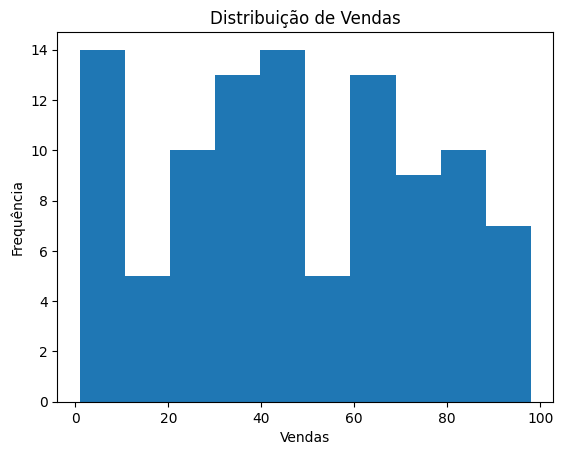

In [15]:
#DISTRIBUIÇÃO DAS VENDAS

import matplotlib.pyplot as plt

# Histograma das vendas
plt.hist(df['Vendas'], bins=10)
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Distribuição de Vendas')
plt.show()


A frequência representa o número de observações que se enquadram em cada intervalo (ou bin) especificado no histograma. É a contagem de quantas vezes os dados estão dentro de um intervalo específico.

Esses números de frequência são importantes para entender a distribuição dos dados, mostrando em quais intervalos a maior parte das observações está concentrada e como as vendas estão distribuídas ao longo desses intervalos. Essa informação é fundamental para analisar padrões e comportamentos nos dados.

Dito isso, é notável como a maior parte dos valores está concentrada nos intervalos de vendas mais baixas, com uma cauda alongada para os intervalos de vendas mais altas.Essa distribuição pode se assemelhar a uma distribuição assimétrica à direita ou distribuição de cauda longa, onde a maior parte das observações está concentrada em valores mais baixos, mas existem alguns valores excepcionais (outliers) com vendas significativamente maiores.

Essas informações são valiosas para entender como as vendas estão distribuídas em diferentes faixas e identificar produtos ou unidades de vendas que se destacam em termos de vendas mais altas. Essa análise pode direcionar estratégias de marketing, estoque ou outros aspectos do negócio para os produtos ou unidades que se destacam ou que precisam de mais atenção.


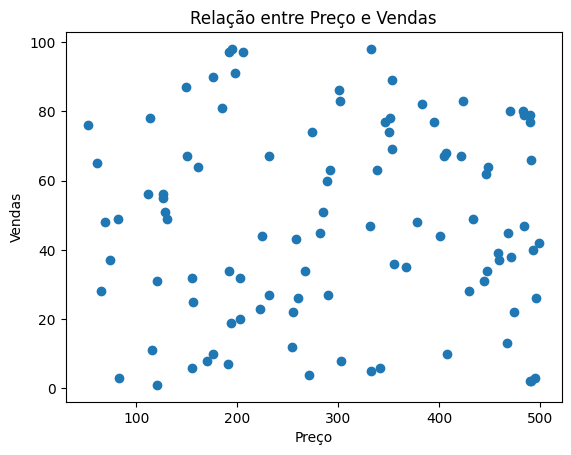

In [9]:
#RELAÇÃO ENTRE PREÇO E AS VENDAS

# Gráfico de dispersão entre vendas e preço
plt.scatter(df['Preço'], df['Vendas'])
plt.xlabel('Preço')
plt.ylabel('Vendas')
plt.title('Relação entre Preço e Vendas')
plt.show()


É possível observar um padrão disperso e uniformemente distribuído nos pontos, sem uma tendência clara. A dispersão dos pontos sugere que não há uma relação linear óbvia entre o preço e as vendas. Com base na visualização, não parece haver uma influência direta do preço nas vendas dos produtos, pelo menos em termos de uma relação linear clara observada nos dados.

In [10]:
# Valores únicos na coluna 'Produto'
print(df['Produto'].unique())


['Produto 4' 'Produto 1' 'Produto 10' 'Produto 9' 'Produto 2' 'Produto 8'
 'Produto 3' 'Produto 7' 'Produto 6' 'Produto 5']


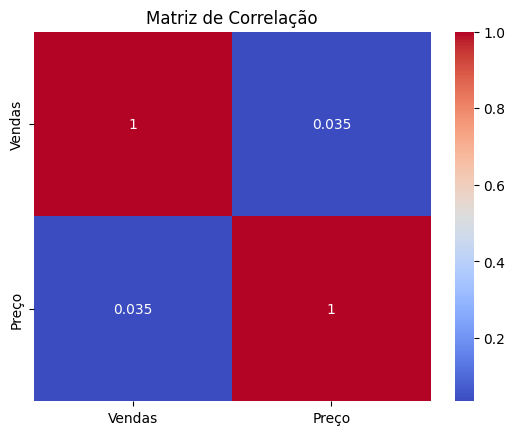

In [11]:
# Calculando a matriz de correlação
correlation = df.corr(numeric_only=True)

# Visualizando a matriz de correlação em um heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()



A correlação entre 'Vendas' e 'Preço' é 0.035.

Como está próxima de zero, indica uma correlação muito fraca ou praticamente inexistente entre essas duas variáveis no conjunto de dados. Isso sugere que não há uma relação linear forte entre o preço e as vendas desse produto. Em outras palavras, o preço do produto não parece ter uma influência significativa nas vendas, pelo menos em uma relação linear direta, com base na análise de correlação feita.

# Passo 5: Análise aprofundada  
explorando relações mais complexas entre as variáveis

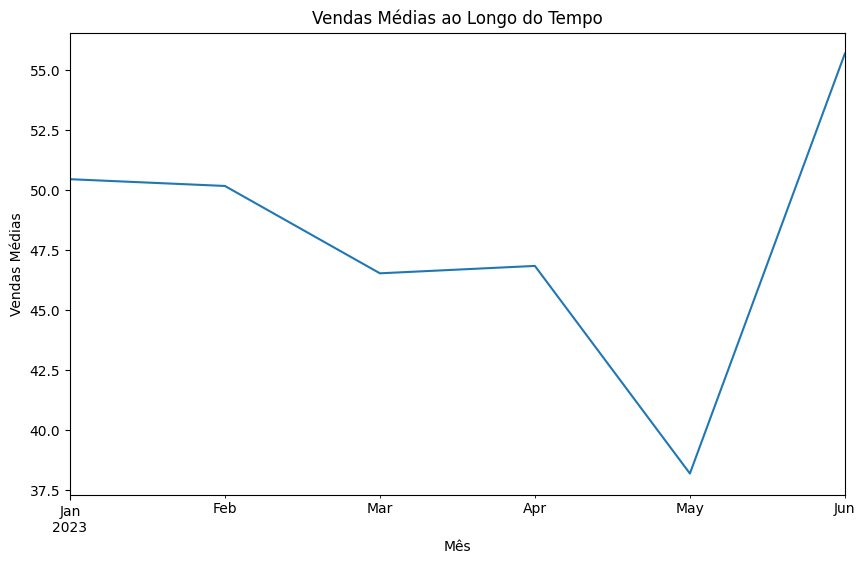

In [12]:
# ANÁLISE TEMPORAL (como o volume de vendas variam ao longo do tempo)

# Agrupar as vendas por mês e calcular a média das vendas mensais
df['Ano_Mes'] = df['Data'].dt.to_period('M')
vendas_por_mes = df.groupby('Ano_Mes')['Vendas'].mean()

# Gráfico de linha das vendas ao longo do tempo
plt.figure(figsize=(10, 6))
vendas_por_mes.plot()
plt.xlabel('Mês')
plt.ylabel('Vendas Médias')
plt.title('Vendas Médias ao Longo do Tempo')
plt.show()


Ao analisar a média das vendas ao longo do tempo, é evidente uma tendência marcante que merece nossa atenção. A trajetória descendente das vendas até o mês de maio, quando atingiu seu ponto mais baixo, apresenta um cenário intrigante. O declínio constante da média das vendas durante esse período sugere um possível desinteresse ou desaceleração do mercado.

No entanto, o que se destaca é a reviravolta notável observada em junho (limite máximo desse dataset). Nesse mês específico, a média das vendas subiu consideravelmente, alcançando seu pico mais alto. Esse aumento surpreendente pode ter várias explicações que merecem consideração.

Uma possibilidade é que mudanças estratégicas foram implementadas nesse período. Talvez tenha ocorrido o lançamento de um novo produto ou serviço, ou ainda, ajustes significativos nos preços que estimularam um aumento repentino no interesse dos consumidores. Estratégias de marketing mais agressivas ou campanhas promocionais podem ter impulsionado esse aumento, atraindo um número significativo de clientes.

Outro aspecto a considerar é o contexto sazonal ou eventos específicos que podem ter impactado as vendas. O período de junho, por exemplo, é marcado por datas comemorativas ou eventos que tradicionalmente impulsionam o consumo. Ações promocionais alinhadas a esses eventos podem ter gerado um aumento expressivo nas vendas, refletindo-se na média.

Essa reviravolta nos números ressalta a importância de uma análise aprofundada do contexto e das estratégias adotadas. Esses dados oferecem uma oportunidade valiosa para identificar padrões, entender as preferências dos consumidores e adaptar estratégias de mercado para otimizar o desempenho futuro.



In [13]:
# TESTE DE CORRELAÇÃO DE PEARSON (para validar hipótese e identificar a intensidade da relação entre vendas e preço)

from scipy.stats import pearsonr

# Calcular coeficiente de correlação de Pearson entre Vendas e Preço
corr_coef, p_value = pearsonr(df['Vendas'], df['Preço'])
print(f"Coeficiente de Correlação de Pearson: {corr_coef}")
print(f"Valor p: {p_value}")


Coeficiente de Correlação de Pearson: 0.034898614603457875
Valor p: 0.7303172447494681


O coeficiente de correlação de Pearson entre as vendas e o preço é de aproximadamente 0.034, que está muito próximo de zero. Isso sugere uma correlação muito fraca entre essas duas variáveis.

O valor p (p-value) associado ao teste de correlação indica a significância estatística da correlação. Um valor p alto, como 0.730 nesse caso, sugere que não há evidências estatísticas suficientes para rejeitar a hipótese nula de que não há correlação significativa entre as variáveis.

Portanto, com base nesses resultados, parece que não há uma relação linear forte entre as vendas e o preço. É importante lembrar que correlação não implica causalidade, ou seja, mesmo com uma correlação fraca, outras variáveis podem influenciar as vendas além do preço.


# Passo 6: Criando visualizações

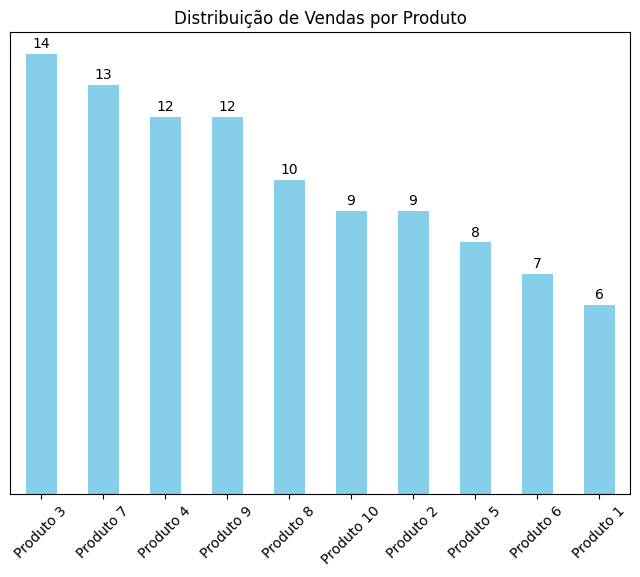

In [16]:
# GRÁFICO DE BARRAS

# Contagem de vendas por produto
vendas_por_produto = df['Produto'].value_counts()

# Gráfico de barras sem as bordas e sem informações do eixo y
plt.figure(figsize=(8, 6))
bars = vendas_por_produto.plot(kind='bar', rot=45, color='skyblue')  # Remoção das bordas e ajuste de cor

# Adicionar os valores no topo de cada barra
for i, value in enumerate(vendas_por_produto):
    bars.text(i, value + 0.2, str(value), ha='center', color='black', fontsize=10)

plt.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remoção das informações do eixo y

plt.title('Distribuição de Vendas por Produto')

plt.show()


Esse gráfico mostra a distribuição das vendas por produtos ordenados com o critério decrescente de quantidade de vendas. No código, foram removidos os rótulos dos eixos e a informação do eixo y foi plotada sob cada barra do eixo x.

# Conlusão

Durante a análise exploratória dos dados de vendas gerados randomicamente co a biblioteca pandas, uma série de padrões e tendências foi identificada, fornecendo insights valiosos sobre o desempenho e a distribuição das vendas.

- Distribuição das Vendas: Observou-se uma distribuição assimétrica à direita, indicando uma concentração significativa de produtos ou unidades de vendas com baixo volume de vendas, enquanto alguns produtos apresentam volumes de vendas consideravelmente mais altos.

- Relação entre Preço e Vendas: Tanto a análise de correlação quanto o gráfico de dispersão revelaram uma relação fraca ou praticamente inexistente entre o preço do produto e as vendas. Isso sugere que, no conjunto de dados analisado, o preço não parece ser um fator determinante para influenciar as vendas de forma linear.

- Padrões de Vendas por Intervalo: Os intervalos menores de vendas (0-20) apresentaram as maiores frequências, indicando que a maioria dos produtos ou unidades de vendas tem vendas nessa faixa. No entanto, mesmo com frequências menores, foram identificados produtos com vendas consideravelmente maiores (acima de 50).

Esses insights oferecem uma compreensão valiosa sobre a distribuição das vendas e a relação entre variáveis importantes. Estratégias de marketing, gestão de estoque e outras ações podem se beneficiar ao direcionar esforços para produtos de alto desempenho ou para explorar melhor as razões por trás dos baixos volumes de vendas em determinados produtos.

É importante ressaltar que esta análise é baseada nos dados disponíveis e pode ser aprimorada com a inclusão de mais variáveis ou uma investigação mais detalhada sobre os padrões identificados.

Vila Velha - ES, 03 Dezembro 2023 |
Pablo Correia |
https://www.linkedin.com/in/pablocorreia0985